In [77]:
from __future__ import print_function, division
from scipy.optimize import curve_fit
from math import factorial as fac
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

%matplotlib inline

import first
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nsfg
import thinkstats2
import math as mt
import thinkplot
import scipy

In [8]:
teams_df = pd.read_csv("basketball_teams.csv") #won

In [10]:
pst_df = pd.read_csv("basketball_series_post.csv") #W

In [16]:
%precision 2 

u'%.2f'

In [18]:
teams_df["won"].describe()

count    1536.000000
mean       37.552734
std        14.166431
min         0.000000
25%        28.000000
50%        39.000000
75%        48.000000
max        72.000000
Name: won, dtype: float64

In [13]:
pst_df["W"].describe()

count    775.000000
mean       3.494194
std        0.762259
min        0.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: W, dtype: float64

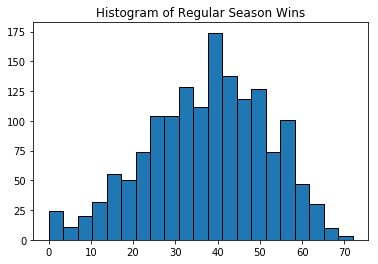

In [30]:
plt.hist(teams_df["won"], bins="auto", edgecolor='k')  
plt.title("Histogram of Regular Season Wins")
plt.show()

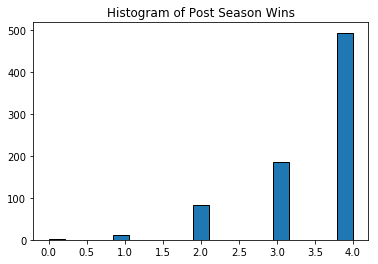

In [31]:
plt.hist(pst_df["W"], bins='auto', edgecolor='k')  
plt.title("Histogram of Post Season Wins")
plt.show()

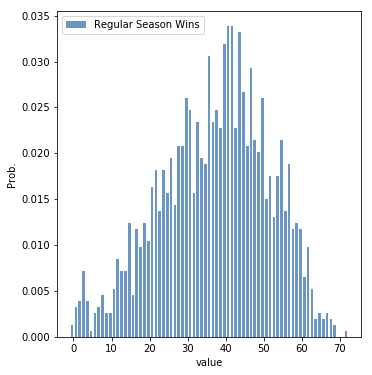

In [73]:
first_pmf = thinkstats2.Pmf(teams_df["won"], label='Regular Season Wins')
other_pmf = thinkstats2.Pmf(pst_df["W"], label='Post Season Wins')
width = 0.7

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='value',ylabel='Prob.')

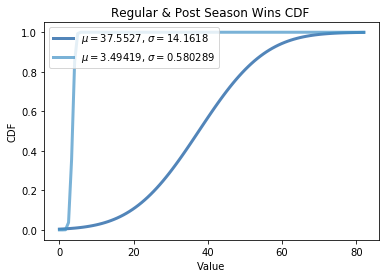

In [58]:
thinkplot.PrePlot(2)

mus = [teams_df["won"].mean(),pst_df["W"].mean()]
sigmas = [np.std(teams_df["won"], axis=0),np.std(pst_df["W"], axis=0)**2]

for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, low=0, high=82)
                                               
    label = r'$\mu=%g$, $\sigma=%g$' % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title='Regular & Post Season Wins CDF ', xlabel='Value', ylabel='CDF',
                 loc='upper left')

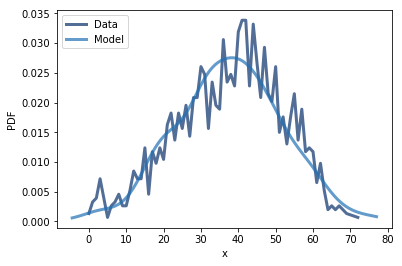

In [86]:
mean, std = teams_df["won"].mean(), teams_df["won"].std()
thinkplot.Pdf(first_pmf, label='Data')
sample = np.random.normal(mean, std, 500)
sample_pdf = thinkstats2.EstimatedPdf(sample, label='sample')
thinkplot.Pdf(sample_pdf, label='Model')
thinkplot.Config(xlabel='x', ylabel='PDF')